# Perceptron With Hebb Rule For Linear Data

This post consists of:
0. Generating Synthetic Data
1. Network Structure
2. Preparing Data
    1. Convert Data to Numpy Array
    2. Create Labels
    3. Shuffle Data
    4. Split Into Train and Test
3. Build Perceptron
4. Training and Evaluation
    1. Sigmoid
    2. Tanh
5. Visualization

## 0 Generating Synthetic Data
In this section we just generate 200 randomly sampled data which are **linearly** separable.

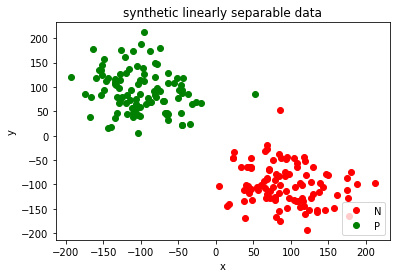

In [2]:
import numpy as np
######################
# Create random data
#####################
random_positive = np.random.normal(100,45,100)
random_negative = np.random.normal(-100,45,100)
N=[(x,y) for x,y in zip(random_positive,random_negative)] 
P=[(x,y) for x,y in zip(random_negative,random_positive)]
########################
# Data Visualization
########################
import matplotlib.pyplot as plt
plt.plot([x for x,y in N], [y for x,y in N], 'ro', label='N')
plt.plot([x for x,y in P], [y for x,y in P], 'go', label='P')

plt.title('synthetic linearly separable data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')

plt.show()

## 1 Network Structure
1. I have chosen a singple perceptron to handle this classification and the reason is that a single perceptron can approximate any linear function no matter the dimensionality of input data.
2. The number of features here are 2 so the I have considered 2 input for perceptron or weight of shape (2, 1).
3. I have used gradient descent to optimize the weights of the perceptron.
4. Other parameters and the explanation of the how the model works has been expained through the following sections.

## 2 Preparing Data
In this step we take care of data using following steps:
1. Convert data to numpy array
2. Create labels
3. Shuffle data
4. Split data into train and test

### 2.A Convert Data to Numpy Array
As I am going to use numpy matrix operations, I need to convert all of our data to numpy arrays.

In [3]:
data= []
size = 200
data.extend(N)
data.extend(P)
x = np.zeros((size, 2))
for idx, s in enumerate(data):
    x[idx, 0] = s[0]
    x[idx, 1] = s[1]

### 2.B Create Labels
Perceptron algorithm is a supervised learning task, so the data needs labels and I have assigned:
1. 0 for Red
2. 1 for Green

Note any combination is possible.

In [4]:
y = np.zeros((size, 1))
y[size//2:,] = 1

### 2.C Shuffle Data
I have shuffled data because initial data was in order. In other words, first 100 data had same label and latter half had same label so the network may memorize this order.

In [5]:
perm = np.random.permutation(size)
x = x[perm]
y = y[perm]

## 2.D Split Into Train and Test
For validation purposes, I splitted data into train and test set to have more reliable accuracy.

In [6]:
train_test_ratio = 0.9
x_train = x[0:int(train_test_ratio*size)]
y_train = y[0:int(train_test_ratio*size)]
x_test = x[int(train_test_ratio*size):]
y_test = y[int(train_test_ratio*size):]

## 3 Build Perceptron
1. Initializing weights randomly using normal distribution
    1. This Step is very important and till now between different ways of weight initialization like Quasi random etc, normal random has had better results.
    2. Initializing weights using any number is possible but it would be much more faster if we choose small values without zero weights because zero weights just stop learning!
2. Activation function
    1. This functions return the defined function's value regarding current weights and input values to the functions.
    2. I have defined two most known functions, `sigmoid` and `tanh`.
    3. I prefer using `tanh` as it maps values between `[0, 1]` which prevents biasing in next iterations.
3. Feed Foward
    1. Feedforward just multiplies input data and weights and pass it to activation function.
    2. The result is networks prediction regarding given input
4. Training
    1. Feedforward step has been explained in the previous sections.
    2. We calculate error as the difference between predictions and desired lables.
    3. Now we have the error, the only thing we need to do is to to multiply input by error to effect the error as we do the same in the hyposis function (forward without activation).
5. Testing
    1. Testing step is only forward pass after training weights
6. Score
    1. Calculating score is just dividing number of correct predictions by number of tests.

In [12]:
class Perceptron:
    def __init__(self, num_features, learning_rate = 0.5, weights = None, activation='sigmoid', threshold=0.2):
        """
        Defines a Perceptron structure
        
        :param num_features: Number of input features
        :param learning_rate: eta or learning rate as a coefficient for weight updating
        :param weights: Use pretrained weights to omit training phase
        :param activation: Can be `str` or `callable`. If `str` {`sigmoid` or 'tanh'} should be chosen, else, 
        callable function will work as activation function. (no validation)
        :param threshold: Threshold used to convert the output of activation function to {0, 1} (or desired binary values)
        :return: A object
        """
        
        if weights is None:
            self.weights = np.random.randn(num_features, 1)
        else:
            self.weights = weights
        self.activation = activation
        self.learning_rate = learning_rate
        self.num_features = num_features
        self.threshold = threshold
    
    def _sigmoid(self, x):
        """
        Applies sigmoid function on data
        
        :param x: numpy ndarray
        :return: numpy ndarray
        """
        return 1 / (1 + np.exp(-x))
    
    def activation_func(self, x):
        """
        Applies predefined activation functions
        
        :param x: numpy ndarray
        :return: numpy ndarray
        """
        if self.activation == 'sigmoid':
            return self._sigmoid(x)
        elif self.activation == 'tanh':
            return np.tanh(x)
        else:
            raise Exception('Activation has not defined!')
            
    def forward(self, x):
        """
        Applies feed forward logic regarding predefined activation function or callable
        
        :param x: numpy ndarray
        :return: numpy ndarray
        """
        if type(self.activation) == str:
            return self.activation_func(np.dot(x, self.weights))
        else:
            return self.activation(np.dot(x, self.weights))
    
    def train(self, x, y, epochs):
        """
        Applies training procedure
        
        :param x: numpy ndarray of input features
        :param y: numpy ndarray of input labels
        :param epochs: Number of epochs to be trained
        :return: None
        """
        for e in range(epochs):
            predictions = self.forward(x)
            error = predictions - y
            self.weights -= self.learning_rate * np.dot(x.T, (error))
    
    def test(self, x):
        """
        Tests network using trained weights obtained from `train` method.
        Maps output of activation functions to desired binary class using given threshold
        
        :param x: numpy ndarray of input features
        :return: numpy ndarray of predictions
        """
        preds = self.forward(x)
        preds[preds < self.threshold] = 0
        preds[preds > 1-self.threshold] = 1
        return preds
    
    def score(self, x, y):
        """
        Calculates the accuracy of model
        
        :param x: numpy ndarray of input features
        :param y: numpy ndarray of input labels
        :return: A float value in range of (0, 100)
        """
        return np.count_nonzero(self.test(x) == y) *100/ len(x)

## 4 Training and Evaluation
1. Sigmoid
2. Tanh

### 4.A Sigmoid
Using sigmoid as the activation function of the perceptron.

In [13]:
perceptron = Perceptron(num_features=2, activation='sigmoid')
perceptron.train(x_train, y_train, 1000)
pred = perceptron.test(x_test)
perceptron.score(x_test, y_test)

100.0

### 4.B Tanh
Using tanh as the activation function of the perceptron.

In [14]:
perceptron = Perceptron(num_features=2, activation='tanh')
perceptron.train(x_train, y_train, 1000)
pred = perceptron.forward(x_test)
perceptron.score(x_test, y_test)

100.0

## 5 Visualization

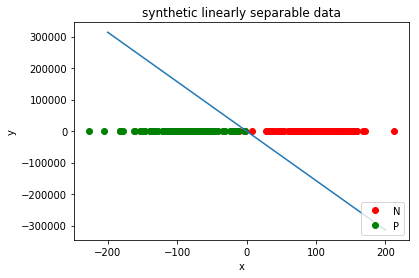

In [15]:
plt.plot([x for x,y in N], [y for x,y in N], 'ro', label='N')
plt.plot([x for x,y in P], [y for x,y in P], 'go', label='P')

z = np.linspace(-200, 200, 200).reshape(-1,1)
plt.plot(z, np.dot(z, perceptron.weights.T)[:,1])

plt.title('synthetic linearly separable data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')

plt.show()